In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

sdf = spark.read.csv("Files/Drug_Consumption_Quantified.csv", header=True, inferSchema=True)
sdf.head(5)

df = sdf.toPandas()


# X and targets y definitions
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
        'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']]

target_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
               'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 
               'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
               'Mushrooms', 'Nicotine', 'VSA']

y = df[target_cols]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(, ed11d492-26af-4d3e-bff6-571e47c34203, 7, Finished, Available, Finished)

StatementMeta(, ed11d492-26af-4d3e-bff6-571e47c34203, 8, Finished, Available, Finished)

         Drug  Accuracy
8       Crack  0.870027
10     Heroin  0.854111
11   Ketamine  0.803714
17        VSA  0.771883
14       Meth  0.755968
2        Amyl  0.732095
4        Caff  0.726790
12     Legalh  0.647215
13        LSD  0.633952
9     Ecstasy  0.591512
7        Coke  0.572944
15  Mushrooms  0.535809
3      Benzos  0.525199
1      Amphet  0.503979
6        Choc  0.424403
5    Cannabis  0.403183
0     Alcohol  0.384615
16   Nicotine  0.360743


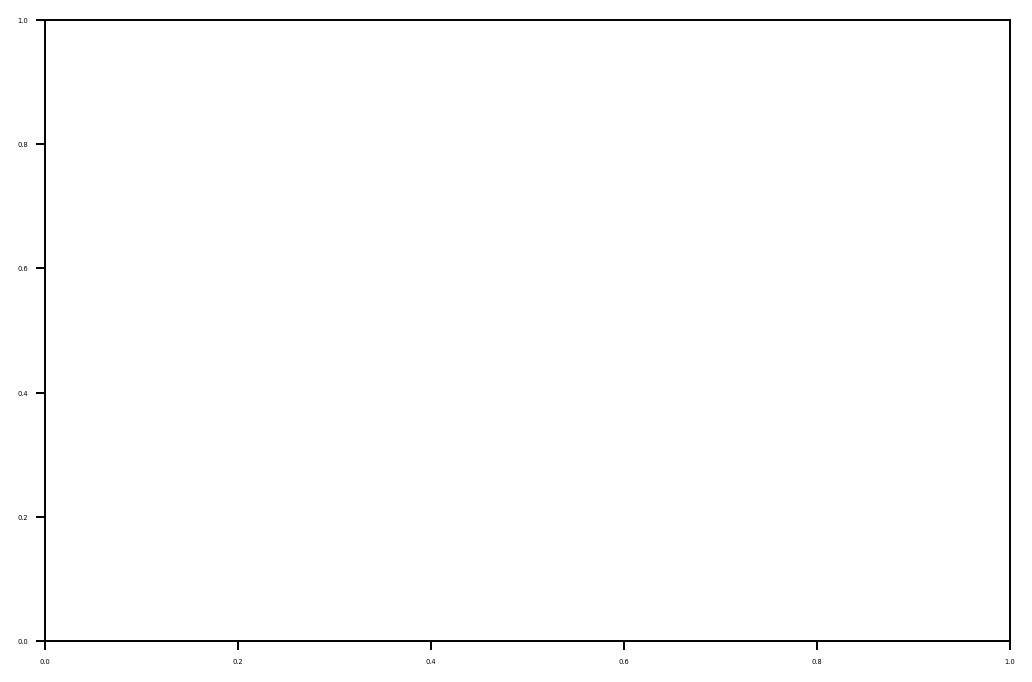

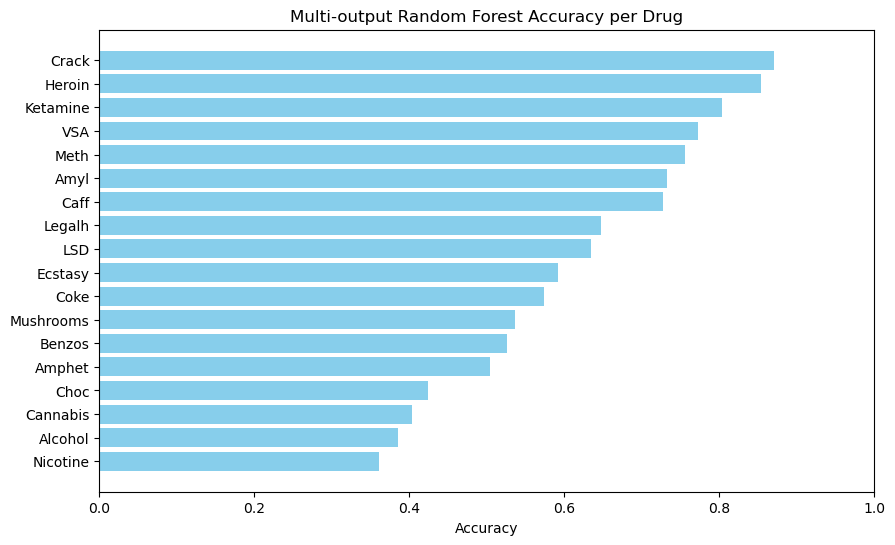

In [6]:
# Train one multiclass classification model to predict 18 output features

# Multi-output Random Forest model
rf_base = RandomForestClassifier(n_estimators=200, random_state=42)
multi_rf = MultiOutputClassifier(rf_base)
multi_rf.fit(X_train, y_train)

# Prediction
y_pred = multi_rf.predict(X_test)

# Accuracy calculation for all 16 drugs
accuracies = {}
for i, col in enumerate(target_cols):
    acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    accuracies[col] = acc

# Add results to a dataframe
results_df = pd.DataFrame(list(accuracies.items()), columns=["Drug", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print(results_df)
# Bar plot
plt.figure(figsize=(10,6))
plt.barh(results_df['Drug'], results_df['Accuracy'], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Multi-output Random Forest Accuracy per Drug")
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # The highest accuracy at the top
plt.show()

18 target drugs were predicted using a Multi-Output Random Forest model. The model demonstrated high accuracy for drugs with distinct usage patterns, such as Crack (87.0%), Heroin (85.4%), and Ketamine (80.3%). However, accuracy remained low for common or homogeneous drugs, such as Alcohol (38.5%), Nicotine (36.1%), and Choc (42.4%). These results suggest that while predicting rare drugs is easier, the model struggles with class imbalance and complex usage patterns for common drugs.